#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import tweepy
import json
import io
%matplotlib inline

# Gathering

#### Archive

In [2]:
arc = pd.read_csv('twitter-archive-enhanced.csv')
arc.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Images

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = url.split('/')[-1]
with open(os.path.join(file_name), mode = 'wb') as file:
    file.write(response.content)

In [4]:
img = pd.read_csv('image-predictions.tsv', sep = '\t')
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Tweeter

In [6]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)

In [7]:
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search, q='tweepy').items(10):
    print(tweet.text)

RT @spacebruce: well i'm heckin stumped, looks like the tweepy library is bugging out. https://t.co/Pu300LXaZ4
well i'm heckin stumped, looks like the tweepy library is bugging out. https://t.co/Pu300LXaZ4
RT @chinryu: 日本のツイートトレンドTOP10は['#holoCouncil', '#おは戦30823ag', '勇者・魔王・神のどれ', '#あさチャン', 'ヴィニシウス', '#SUPERRICH', 'ホシミナイト', 'レバンテ', 'ゲームの世界', '…
@CoderDrax  Latest Covid Updates:-
                   Total Cases : 212,542,904 
Active Cases :17,967,391    Closed… https://t.co/EGgy2TYfR5
日本のツイートトレンドTOP10は['#holoCouncil', '#おは戦30823ag', '勇者・魔王・神のどれ', '#あさチャン', 'ヴィニシウス', '#SUPERRICH', 'ホシミナイト', 'レバンテ',… https://t.co/oeVodVVToi
@CerebralPalsite @QuinterApp @HereBeSaoirse @gb123geo @TwCakeApp Because Tweepy is not api v2 ready, and there's no… https://t.co/lYZYLvozU6
日本のツイートトレンドTOP10は['#holoCouncil', '#日向坂で会いましょう', '#おは戦30823ag', '#krotime', '感度3000倍', '#東村芽依生誕祭', '横浜市長選', '忠犬系男子'… https://t.co/luIohrDM5o
@CoderDrax  Latest Covid Updates:-
                   Total Cases : 212,516,165 
Active Ca

In [8]:
arc.shape

(2356, 17)

In [40]:
tweeter_list = []
id_tweet = []
favorite_count = []
retweet_count = []
for i in arc['tweet_id']:
    try:
        b = api.get_status(i)
        b = b._json
        tweeter_list.append({'id_tweet':b['id'], 'favorite_count':b['favorite_count'], 'retweet':b['retweet_count']})
    except:
        tweeter_list.append({'id_tweet':i, 'favorite_count': 'Missing', 'retweet': 'Missing'})

tweeter = pd.DataFrame(tweeter_list, columns = ['id_tweet', 'favorite_count', 'retweet'])
tweeter.head()

,id_tweet,favorite_count,retweet
0,892420643555336193,34550,7193
1,892177421306343426,29944,5399
2,891815181378084864,22535,3565
3,891689557279858688,37785,7416
4,891327558926688256,36086,7951


In [45]:
tweeter = tweeter.to_csv()
f = open('tweeter_output.csv', 'w')
f.write(tweeter)
f.close

<function TextIOWrapper.close()>

# Assessing
- Each dataset will be assessed and cleaned separately.
- At the end of each assessing section for each dataset, it is the assessment result.
- Each cleaning operation is done under the Define, Code, Test frame.

## Tweeter

### Assessing

In [117]:
twt = pd.read_csv('tweeter_output.csv')
twt.head()

,Unnamed: 0,id_tweet,favorite_count,retweet
0,0,892420643555336193,34550,7193
1,1,892177421306343426,29944,5399
2,2,891815181378084864,22535,3565
3,3,891689557279858688,37785,7416
4,4,891327558926688256,36086,7951


In [118]:
sum(twt.id_tweet.duplicated())

0

In [119]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2356 non-null   int64 
 1   id_tweet        2356 non-null   int64 
 2   favorite_count  2356 non-null   object
 3   retweet         2356 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.8+ KB


1. There is an unnamed column which is redundant with the index. Drop column unnamed.
2. Change name: retweet for retweet_count to have consistency in the naming.
3. Favorite_count and retweet columns are strings (objects) and must be integers.
4. Id field is int and should be string.

### Cleaning

#### 1. There is an unnamed column which is redundant with the index. Drop column unnamed.

##### Define:
- drop unnamed column

##### Code

In [120]:
twt_clean = twt.copy()
twt_clean.drop('Unnamed: 0', axis = 1, inplace = True)

##### Test

In [121]:
twt_clean.columns

Index(['id_tweet', 'favorite_count', 'retweet'], dtype='object')

#### 2. Change name: retweet for retweet_count to have consistency in the naming.


###### Define:
- Rename column retweet for retweet_count.

###### Code

In [122]:
twt_clean.rename(columns={'retweet':'retweet_count'}, inplace = True)

###### Test

In [123]:
twt_clean.columns

Index(['id_tweet', 'favorite_count', 'retweet_count'], dtype='object')

#### 3. Favorite_count and retweet columns are strings (objects) and must be integers

##### Define:
- Turn strings into integers for favorite_count and retweet_count

##### Code

In [124]:
for n,i in enumerate(twt_clean['favorite_count']):
    try:
        int(twt_clean.loc[n,'favorite_count'])
    except:
        twt_clean.loc[n, 'favorite_count'] = 0

In [125]:
twt_clean.favorite_count.describe()

count     2356
unique    1841
top          0
freq       187
Name: favorite_count, dtype: int64

In [126]:
for n, i in enumerate(twt_clean['retweet_count']):
    try:
        int(twt_clean.loc[n, 'retweet_count'])
    except:
        twt_clean.loc[n, 'retweet_count'] = 0

In [127]:
twt_clean['retweet_count'].describe()

count     2356
unique    1581
top          0
freq       187
Name: retweet_count, dtype: int64

In [128]:
twt_clean[['favorite_count', 'retweet_count']] = twt_clean[['favorite_count', 'retweet_count']].astype(int)

##### Test

In [129]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_tweet        2356 non-null   int64
 1   favorite_count  2356 non-null   int32
 2   retweet_count   2356 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 36.9 KB


In [130]:
twt_clean.head()

,id_tweet,favorite_count,retweet_count
0,892420643555336193,34550,7193
1,892177421306343426,29944,5399
2,891815181378084864,22535,3565
3,891689557279858688,37785,7416
4,891327558926688256,36086,7951


#### 4. Id field is int and should be string(object).

###### Define:
Change type of id field to object.

###### Code

In [131]:
twt_clean['id_tweet'] = twt_clean['id_tweet'].astype(str)

###### Test

In [132]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_tweet        2356 non-null   object
 1   favorite_count  2356 non-null   int32 
 2   retweet_count   2356 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


## ARCHIVE - ARC

### Assessing

In [133]:
arc = pd.read_csv('twitter-archive-enhanced.csv')
arc.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [134]:
sum(arc.tweet_id.duplicated())

0

In [135]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

###### Archive.DogStages

In [136]:
arc.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [137]:
arc.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [138]:
arc.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [139]:
arc.puppo.unique()

array(['None', 'puppo'], dtype=object)

###### Archive.Numerator

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

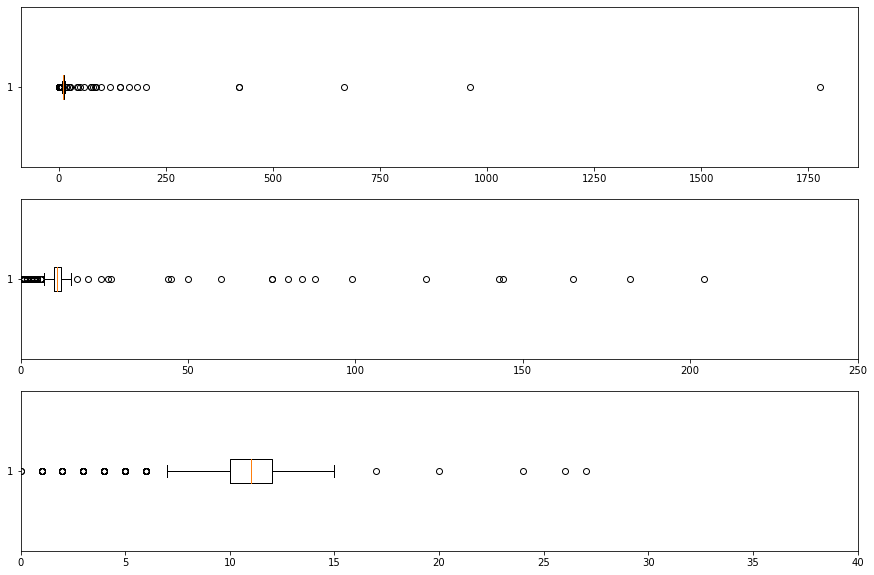

In [140]:
bins = np.arange(0,arc['rating_numerator'].max()+1, 10)
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
plt.boxplot(data = arc, x = arc['rating_numerator'], vert = False)

plt.subplot(3,1,2)
plt.boxplot(data = arc, x = arc['rating_numerator'], vert = False)
plt.xlim(0,250)

plt.subplot(3,1,3)
plt.boxplot(data = arc, x = arc['rating_numerator'], vert = False)
plt.xlim(0,40)
;
arc['rating_numerator'].describe()

In [141]:
q1 = arc['rating_numerator'].quantile(0.25)
q3 = arc['rating_numerator'].quantile(0.75)
iqr = q3-q1
pd.cut(arc['rating_numerator'], 
       [q1-1.5*iqr, q1, q3, q3+1.5*iqr], labels = ['lw', 'iqr', 'rw']).value_counts(dropna = False)

iqr    1022
lw      721
rw      407
NaN     206
Name: rating_numerator, dtype: int64

In [142]:
arc['rating_numerator'].value_counts().index

Int64Index([  12,   11,   10,   13,    9,    8,    7,   14,    5,    6,    3,
               4,    2,    1,   75,   15,  420,    0,   80,  144,   17,   26,
              20,  121,  143,   44,   60,   45,   50,   99,  204, 1776,  165,
             666,   27,  182,   24,  960,   84,   88],
           dtype='int64')

###### Archive.Denominator

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

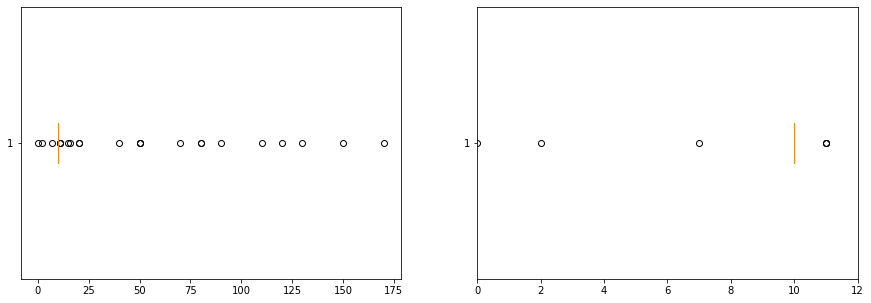

In [143]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(arc['rating_denominator'], vert= False)

plt.subplot(1,2,2)
plt.boxplot(arc['rating_denominator'], vert = False)
plt.xlim(0,12)
;
arc['rating_denominator'].describe()

In [144]:
sum((arc['rating_denominator']!=10))

23

In [145]:
arc.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [146]:
sum(arc['rating_denominator']==0)

1

In [147]:
arc.query('rating_denominator ==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [148]:
arc['rating_denominator'].value_counts().index

Int64Index([10, 11, 50, 20, 80, 70, 7, 15, 150, 170, 0, 90, 40, 130, 110, 16,
            120, 2],
           dtype='int64')

##### Archive.DogNames

In [149]:
arc['name'].describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [150]:
a = arc['name'].value_counts(dropna = False)
a = pd.DataFrame(a)
a[a['name']>1]

,name
None,745
a,55
Charlie,12
Cooper,11
Lucy,11
...,...
Franklin,2
Jimison,2
Hercules,2
Canela,2


In [151]:
false_names = arc[arc['name'].str.islower()]['name'].value_counts().index
false_names

Index(['a', 'the', 'an', 'very', 'just', 'quite', 'one', 'getting', 'actually',
       'mad', 'not', 'old', 'life', 'officially', 'light', 'by', 'infuriating',
       'such', 'all', 'unacceptable', 'this', 'his', 'my', 'incredibly',
       'space'],
      dtype='object')

1. Rating denominator: there is only one zero.
2. Rating numerator variable is not relevant by itself because of its range larger than denominator. Create num/denom field to catch the ratings as one variable. (Boxplot above for reference)
3. Dog Names: Values which are not dog's names should be replaced for None.
4. Dog Stages. It is shaped as dummy variables. Transform to one variable (dog stages).
5. Id field is int and should be string(object).
6. Rating denominator and Rating numerator should be floats and not integers.

### Cleaning

#### 1. Rating denominator: there is only one zero.

In [152]:
arc_clean = arc.copy()

###### Define:
- Remove row with rating_denominator zero.

###### Code

In [153]:
arc_clean.drop([313], inplace = True)

###### Test

In [154]:
arc_clean.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 2. Rating numerator variable is not relevant by itself because of its range larger than denominator. Create num/denom field to catch the ratings as one variable.

###### Define:
- Create new column to compute rating_num divided by rating_denom.

###### Code

In [155]:
arc_clean['rating'] = arc_clean['rating_numerator']/arc_clean['rating_denominator']

###### Test

In [156]:
arc_clean['rating'].describe()

count    2355.000000
mean        1.222032
std         4.083485
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

#### 3. Dog Names: Values which are not dog's names should be replaced for None.

###### Define:
- Replace value names in false_names with None in Name column.

###### Code

In [157]:
arc_clean['name'].replace(false_names, value = None, inplace = True)

###### Test

In [158]:
a = arc_clean['name'].value_counts(dropna = False)
a = pd.DataFrame(a)
for i in false_names:
    try:
        a.loc[i]
    except:
        print('No {} in index'.format(i))

No a in index
No the in index
No an in index
No very in index
No just in index
No quite in index
No one in index
No getting in index
No actually in index
No mad in index
No not in index
No old in index
No life in index
No officially in index
No light in index
No by in index
No infuriating in index
No such in index
No all in index
No unacceptable in index
No this in index
No his in index
No my in index
No incredibly in index
No space in index


In [159]:
arc_clean[arc_clean['name'].str.islower()]['name'].value_counts().index

Index([], dtype='object')

#### 4. Dog Stages. It is shaped as dummy variables. Transform to one variable (dog stages).

###### Define:
- Create column with stages as categorical variable.

###### Code

In [160]:
arc_clean['stage'] = (arc_clean.pupper.replace("None",'') + " " +  arc_clean.doggo.replace("None",'') + " " + \
                    + arc_clean.floofer.replace("None",'') + " " + arc_clean.puppo.replace("None",'')).str.strip()

In [161]:
arc_clean['stage'] = arc_clean['stage'].str.replace('  ', '-')
arc_clean['stage'] = arc_clean['stage'].str.replace(' ', '-')

###### Test

In [162]:
arc_clean['stage'].value_counts()

                 1975
pupper            245
doggo              83
puppo              29
pupper-doggo       12
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: stage, dtype: int64

In [163]:
arc_clean['stage'].value_counts(dropna = False)

                 1975
pupper            245
doggo              83
puppo              29
pupper-doggo       12
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: stage, dtype: int64

#### 5. Id field is int and should be string(object).

###### Define:
Change type of id field to string(object)

#### Code

In [164]:
arc_clean['tweet_id'] = arc_clean['tweet_id'].astype(str)

###### Test

In [165]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2355 non-null   object 
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2355 non-null   object 
 4   source                      2355 non-null   object 
 5   text                        2355 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2355 non-null   int64  
 11  rating_denominator          2355 non-null   int64  
 12  name                        2355 non-null   object 
 13  doggo                       2355 

#### 6. Rating denominator and Rating numerator should be floats and not integers.

###### Define:
Change type for Denominator and Numerator. Both should be float.

###### Code

In [166]:
arc_clean[['rating_denominator', 'rating_numerator']] = arc_clean[['rating_denominator', 
                                                                 'rating_numerator']].astype(float)

###### Test

In [167]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2355 non-null   object 
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2355 non-null   object 
 4   source                      2355 non-null   object 
 5   text                        2355 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2355 non-null   float64
 11  rating_denominator          2355 non-null   float64
 12  name                        2355 non-null   object 
 13  doggo                       2355 

## IMAGES

### Assessing

In [168]:
img = pd.read_csv('image-predictions.tsv', sep = '\t')
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [169]:
sum(img.tweet_id.duplicated())

0

In [170]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [171]:
img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [172]:
sum(img.p1_conf<img.p2_conf)

0

In [173]:
sum(img.p2_conf<img.p3_conf)

0

In [174]:
img.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [175]:
img.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [176]:
img.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

1. We need only the rows with real breeds predictions.
2. We need one prediction for each tweet_id, with its confidence.
3. Id field is int and should be string(object).

### Cleaning

In [177]:
img_clean = img.copy()

#### 1. We need only the rows with real breeds predictions.

###### Define:
- Create a dataset including only rows with True values in any of the following columns: p1_dog, p2_dog, p3_dog

###### Code

In [178]:
img_clean = img_clean[img_clean[['p1_dog', 'p2_dog', 'p3_dog']].any(1)]

###### Test

In [179]:
len(img_clean[img_clean[['p1_dog', 'p2_dog', 'p3_dog']].any(1)])

1751

In [180]:
a = img_clean.p1_dog + img_clean.p2_dog + img_clean.p3_dog
a.describe()

count     1751
unique       1
top       True
freq      1751
dtype: object

In [181]:
a.value_counts()

True    1751
dtype: int64

#### 2. We need one prediction for each tweet_id, with its confidence.

###### Define:
- Create two new columns:
    - One for the breed value with the highest p_conf value
    - Another columns for the p_conf value. (the highest)

###### Code

In [182]:
img_clean['p'] = None
img_clean['p_dog'] = None
for i in img_clean.index:
    if img_clean['p1_dog'][i] == True:
        img_clean['p'][i] = img_clean['p1_conf'][i]
        img_clean['p_dog'][i] = img_clean['p1'][i]
    elif img_clean['p2_dog'][i] == True:
        img_clean['p'][i] = img_clean['p2_conf'][i]
        img_clean['p_dog'][i] = img_clean['p2'][i]
    elif img_clean['p3_dog'][i] == True:
        img_clean['p'][i] = img_clean['p3_conf'][i]
        img_clean['p_dog'][i] = img_clean['p3'][i]
    else:
        img_clean['p'][i] = None
        img_clean['p_dog'][i] = None

<ipython-input-182-71f34d82a471>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_clean['p'][i] = img_clean['p1_conf'][i]
<ipython-input-182-71f34d82a471>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_clean['p_dog'][i] = img_clean['p1'][i]
<ipython-input-182-71f34d82a471>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  img_clean['p'][i] = img_clean['p3_conf'][i]
<ipython-input-182-71f34d82a471>:12: SettingWithCopyWarning: 

###### Test

In [183]:
sum(img_clean['p_dog'].isna())

0

In [184]:
img_clean.p_dog.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'golden_retriever',
       'miniature_poodle', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'Newfoundland', 'malamute',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'Blenheim_spaniel',
       'Pembroke', 'Irish_terrier', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'Rottweiler', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'boxer',
   

In [185]:
img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311,miniature_pinscher


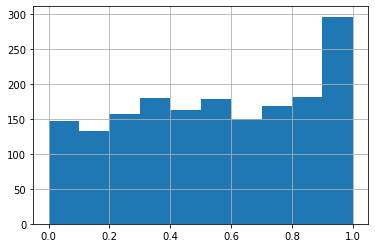

In [186]:
img_clean['p'].hist();

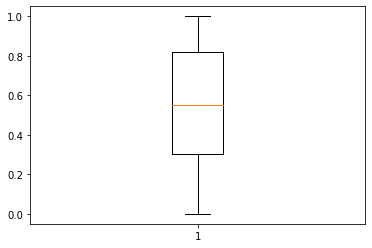

In [187]:
plt.boxplot(img_clean['p']);

#### 3. Id field is int and should be string(object).

###### Define:
Change type of id field for string(object).

###### Code

In [188]:
img_clean['tweet_id'] = img_clean['tweet_id'].astype(str)

###### Test

In [189]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
 12  p         1751 non-null   object 
 13  p_dog     1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 233.8+ KB


# Creating the master dataframe.

In [190]:
img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'p', 'p_dog'],
      dtype='object')

In [191]:
twt_clean.columns

Index(['id_tweet', 'favorite_count', 'retweet_count'], dtype='object')

In [192]:
arc_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'stage'],
      dtype='object')

In [193]:
arc_twt = pd.merge(left = arc_clean, right = twt_clean, how = 'inner', left_on = 'tweet_id', 
        right_on = 'id_tweet')
arc_twt.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'stage', 'id_tweet', 'favorite_count', 'retweet_count'],
      dtype='object')

In [194]:
arc_twt_img = pd.merge(left = arc_twt, right = img_clean, how = 'inner', left_on = 'tweet_id',
                      right_on = 'tweet_id')

### Assessing

In [195]:
arc_twt_img.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,p,p_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,0.323581,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,0.716012,Chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,0.168086,Labrador_retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,0.555712,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,0.425595,Chesapeake_Bay_retriever


In [196]:
arc_twt_img.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'rating', 'stage', 'id_tweet', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'p', 'p_dog'],
      dtype='object')

In [197]:
arc_twt_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1751 non-null   object 
 1   in_reply_to_status_id       20 non-null     float64
 2   in_reply_to_user_id         20 non-null     float64
 3   timestamp                   1751 non-null   object 
 4   source                      1751 non-null   object 
 5   text                        1751 non-null   object 
 6   retweeted_status_id         65 non-null     float64
 7   retweeted_status_user_id    65 non-null     float64
 8   retweeted_status_timestamp  65 non-null     object 
 9   expanded_urls               1751 non-null   object 
 10  rating_numerator            1751 non-null   float64
 11  rating_denominator          1751 non-null   float64
 12  name                        1751 non-null   object 
 13  doggo                       1751 

1. Redundant columns: tweet_id, doggo, floofer, pupper, puppo.
2. Unnecesary columns: rating_denominator, rating_ numerator, p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf.

### Cleaning

In [198]:
arc_twt_img_clean = arc_twt_img.copy()

#### 1. Redundant columns: tweet_id, doggo, floofer, pupper, puppo.

###### Define:
- Drop columns id_tweet, doggo, floofer, pupper, puppo.

###### Code

In [199]:
arc_twt_img_clean.drop(['id_tweet', 'doggo', 'floofer', 'pupper',
                                           'puppo'], axis = 1, inplace = True)

###### Test

In [200]:
arc_twt_img_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'stage', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'p', 'p_dog'],
      dtype='object')

#### 2. Unnecesary columns: rating_denominator, rating_ numerator, p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf.

###### Define:
- Drop columns rating_denomi..., rating_numer..., p1, p2, p3, p1_dog, p2_dog, p3_dog, p1_conf, p2_conf, p3_conf

###### Code

In [201]:
arc_twt_img_clean.drop(['rating_denominator', 'rating_numerator', 'p1', 'p2', 'p3',
                       'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf'], 
                      axis = 1, inplace = True)

###### Test

In [202]:
arc_twt_img_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'rating',
       'stage', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p',
       'p_dog'],
      dtype='object')

In [203]:
arc_twt_img_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,stage,favorite_count,retweet_count,jpg_url,img_num,p,p_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,,29944,5399,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0.323581,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,,22535,3565,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0.716012,Chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,,37785,7416,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0.168086,Labrador_retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,,36086,7951,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0.555712,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,1.3,,18200,2672,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0.425595,Chesapeake_Bay_retriever


# Storing the master dataset

In [204]:
master_csv = arc_twt_img_clean.to_csv()
f = open('master.csv', 'w', encoding = 'utf-8')
f.write(master_csv)
f.close

<function TextIOWrapper.close()>

In [205]:
master = pd.read_csv('master.csv')
master.drop('Unnamed: 0', axis = 1, inplace = True)
master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,stage,favorite_count,retweet_count,jpg_url,img_num,p,p_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,29944,5399,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,0.323581,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,22535,3565,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,0.716012,Chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,37785,7416,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,0.168086,Labrador_retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,36086,7951,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,0.555712,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,1.3,NaN,18200,2672,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,0.425595,Chesapeake_Bay_retriever


# Visualization

### Univariate

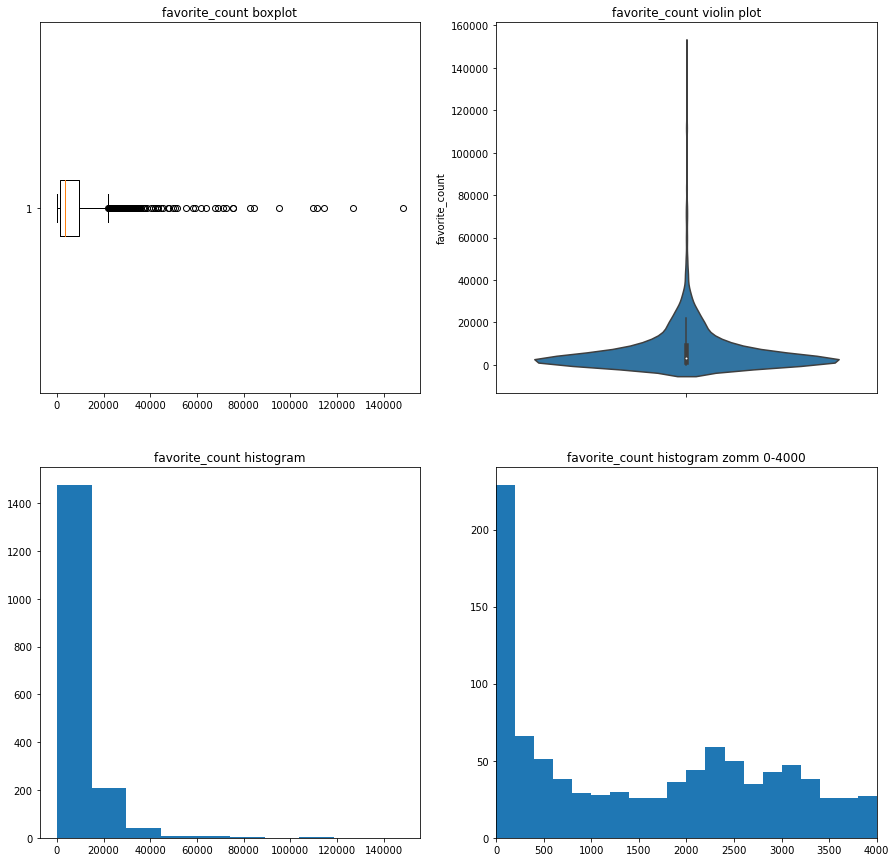

In [206]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.boxplot(master['favorite_count'], vert = False)
plt.title('favorite_count boxplot')

plt.subplot(2,2,2)
sb.violinplot(data = master, y = 'favorite_count')
plt.title('favorite_count violin plot')

plt.subplot(2,2,3)
plt.hist(master['favorite_count'])
plt.title('favorite_count histogram')

plt.subplot(2,2,4)
bins = np.arange(0,master['favorite_count'].max()+1, 200)
plt.hist(master['favorite_count'], bins = bins)
plt.title('favorite_count histogram zomm 0-4000')
plt.xlim(0,4000);

Most of the values for favorite_count are within 0 and 20k.
There are outliers up to +140k.

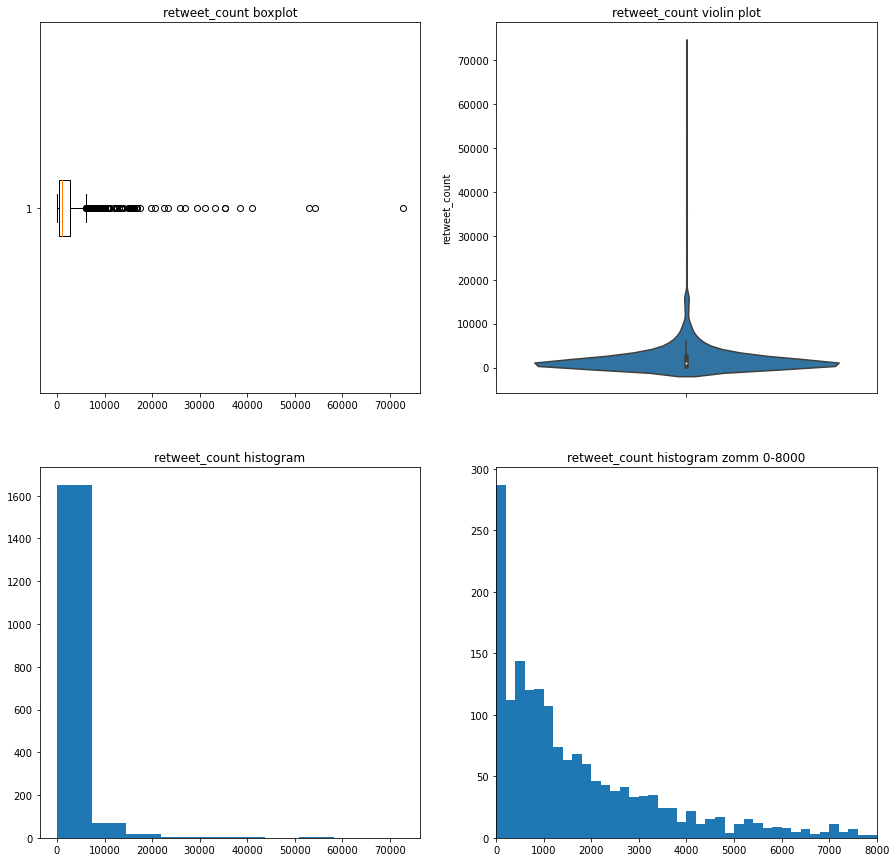

In [207]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.boxplot(master['retweet_count'], vert = False)
plt.title('retweet_count boxplot')

plt.subplot(2,2,2)
sb.violinplot(data = master, y = 'retweet_count')
plt.title('retweet_count violin plot')

plt.subplot(2,2,3)
plt.hist(master['retweet_count'])
plt.title('retweet_count histogram')

plt.subplot(2,2,4)
bins = np.arange(0,master['retweet_count'].max()+1, 200)
plt.hist(master['retweet_count'], bins = bins)
plt.title('retweet_count histogram zomm 0-8000')
plt.xlim(0,8000);

Most of the values for retweet count are between 0 and 10k.
Outliers upto +70k.

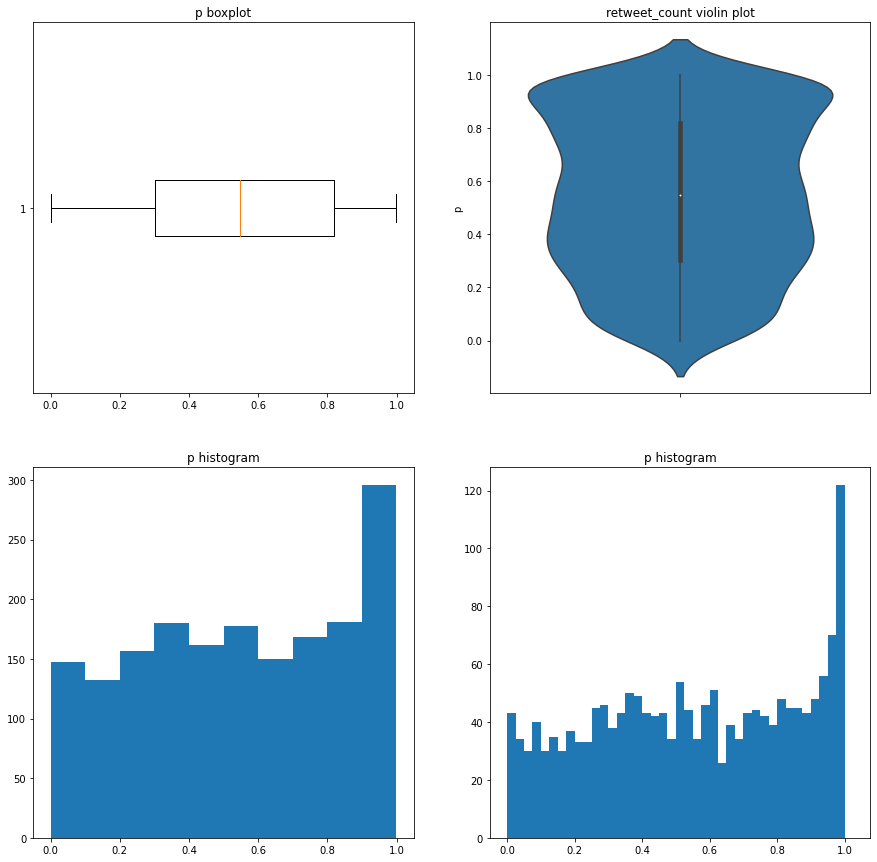

In [208]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.boxplot(master['p'], vert = False)
plt.title('p boxplot')

plt.subplot(2,2,2)
sb.violinplot(data = master, y = 'p')
plt.title('retweet_count violin plot')

plt.subplot(2,2,3)
plt.hist(master['p'])
plt.title('p histogram')

plt.subplot(2,2,4)
bins = np.arange(0,master['p'].max()+0.05, 0.025)
plt.hist(master['p'], bins = bins)
plt.title('p histogram');

Confidence values are quite uniformly distributed across all the range, save but the significant peaks near 1.

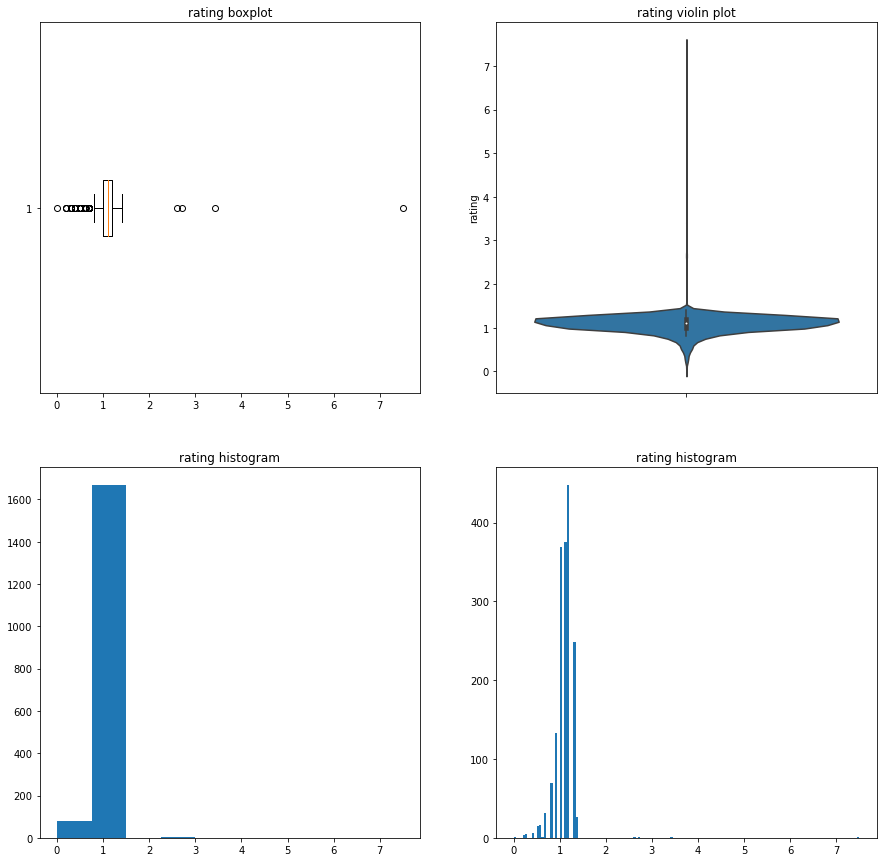

In [209]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.boxplot(master['rating'], vert = False)
plt.title('rating boxplot')

plt.subplot(2,2,2)
sb.violinplot(data = master, y = 'rating')
plt.title('rating violin plot')

plt.subplot(2,2,3)
plt.hist(master['rating'])
plt.title('rating histogram')

plt.subplot(2,2,4)
bins = np.arange(0,master['rating'].max()+0.05, 0.05)
plt.hist(master['rating'], bins = bins)
plt.title('rating histogram');

The highest density for the rating is between 0.75 and 1.25.

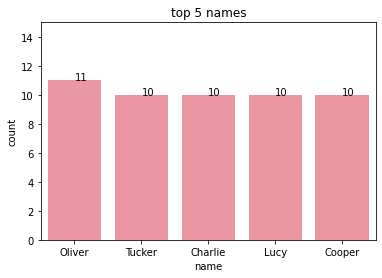

In [210]:
sb.countplot(x = master['name'], 
             order = master.name.value_counts().reset_index()['index'])
plt.xlim(0.5,5.5)
plt.ylim(0,15)

for x,y in enumerate(master.name.value_counts().reset_index()['index'][1:6]):
    plt.text(x+1,
             master.name.value_counts().reset_index()['name'][x+1],
             master.name.value_counts().reset_index()['name'][x+1])
plt.title('top 5 names');

The most common value for Name is None.
Besides that, the top 5 names are as per the figure: Oliver, Lucy, Charly, Tucker, Cooper.

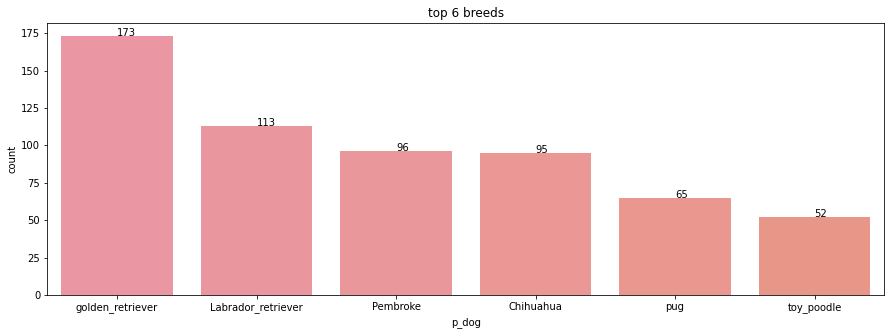

In [211]:
plt.figure(figsize = (15,5))
sb.countplot(x = master['p_dog'], 
             order = master.p_dog.value_counts().reset_index()['index'])
plt.xlim(-0.5,5.5)
#plt.ylim(0,15)

for x,y in enumerate(master.p_dog.value_counts().reset_index()['index'][0:6]):
    plt.text(x,
             master.p_dog.value_counts().reset_index()['p_dog'][x],
             master.p_dog.value_counts().reset_index()['p_dog'][x])
plt.title('top 6 breeds');

The top 6 predicted breeds are golden, labrador, pembroke, chihuahua, pug, and toy_poodle

### Bivariate

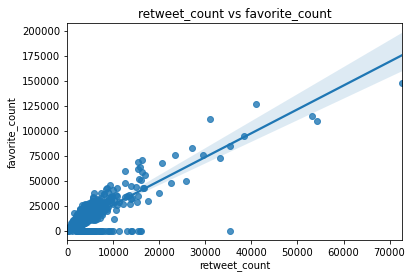

In [212]:
sb.regplot(data = master, x = 'retweet_count', y = 'favorite_count')
plt.title('retweet_count vs favorite_count');

There is a positive correlation between retweet_count and favorite_count.

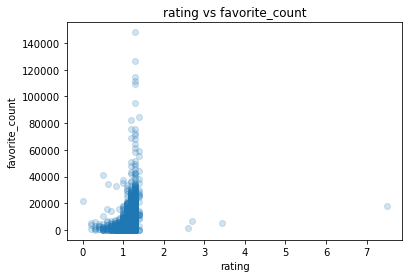

In [213]:
plt.scatter(data = master, x = 'rating', y = 'favorite_count', alpha = 0.2)
plt.xlabel('rating')
plt.ylabel('favorite_count')
plt.title('rating vs favorite_count');

There is not significant correlation between rating and favorite count.

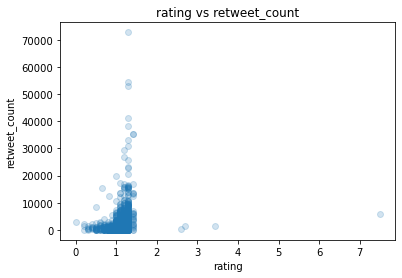

In [214]:
plt.scatter(data = master, x = 'rating', y = 'retweet_count', alpha = 0.2)
plt.title('rating vs retweet_count')
plt.xlabel('rating')
plt.ylabel('retweet_count');

There is not significant correlation between rating and favorite count.

In [215]:
master.groupby('p_dog').mean().sort_values(by = 'favorite_count', ascending = False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating,favorite_count,retweet_count,img_num,p
p_dog,,,,,,,,,,
Bedlington_terrier,7.843395e+17,NaN,NaN,NaN,NaN,1.033333,22054.666667,6874.166667,1.000000,0.286043
Saluki,8.315403e+17,NaN,NaN,NaN,NaN,1.250000,21261.750000,4246.250000,1.000000,0.523054
French_bulldog,7.869341e+17,NaN,NaN,8.688804e+17,4.196984e+09,1.128125,16769.593750,4231.343750,1.156250,0.644992
Bouvier_des_Flandres,8.612885e+17,NaN,NaN,NaN,NaN,1.300000,15712.000000,3679.000000,1.000000,0.082610
black-and-tan_coonhound,7.602637e+17,NaN,NaN,NaN,NaN,1.050000,14971.500000,3410.500000,2.500000,0.692000
...,...,...,...,...,...,...,...,...,...,...
Irish_wolfhound,6.717356e+17,NaN,NaN,NaN,NaN,1.100000,1322.000000,679.000000,2.000000,0.063078
Japanese_spaniel,6.773010e+17,NaN,NaN,NaN,NaN,0.500000,1141.000000,369.000000,1.000000,0.661178
groenendael,6.812840e+17,NaN,NaN,NaN,NaN,1.000000,1002.500000,228.500000,1.000000,0.302625


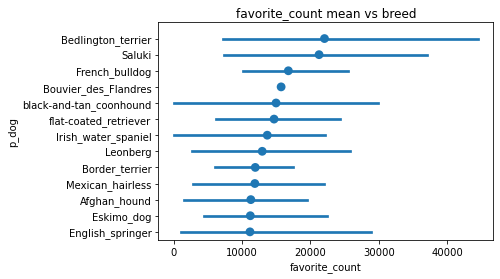

In [216]:
sb.pointplot(data = master, y = 'p_dog', x = 'favorite_count', linestyles = "", 
            order = master.groupby('p_dog').mean().sort_values(by = 'favorite_count', 
                                                               ascending = True).index);
plt.ylim(99.5,113)
plt.title('favorite_count mean vs breed');

The above figure shows the top13 highest favorite_count mean breeds.

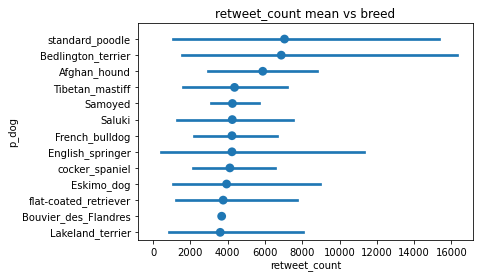

In [217]:
sb.pointplot(data = master, y = 'p_dog', x = 'retweet_count', linestyles = "", 
            order = master.groupby('p_dog').mean().sort_values(by = 'retweet_count', 
                                                               ascending = True).index);
plt.ylim(99.5,113)
plt.title('retweet_count mean vs breed');

The above figure shows the top13 highest retweet_count mean breeds.

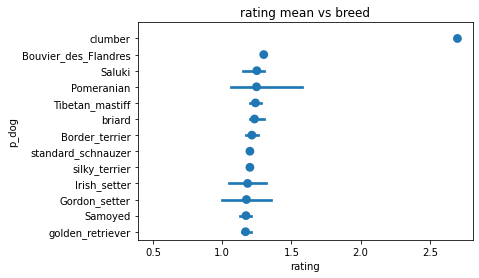

In [218]:
sb.pointplot(data = master, y = 'p_dog', x = 'rating', linestyles = "", 
            order = master.groupby('p_dog').mean().sort_values(by = 'rating', 
                                                               ascending = True).index);
plt.ylim(99.5,113)
plt.title('rating mean vs breed');

The above figure shows the top13 highest rating mean breeds.

#### Resources
To perform this notebook, resources from the following sites were used:
1. Udacity Data Analyst Nanodegree
2. seaborn.pydata.org
3. pandas.pydata.org
4. matplotlib.org